### K Means Clustering with sklearn

In [32]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


#### Visualising the data 

<Axes: xlabel='Age', ylabel='Income'>

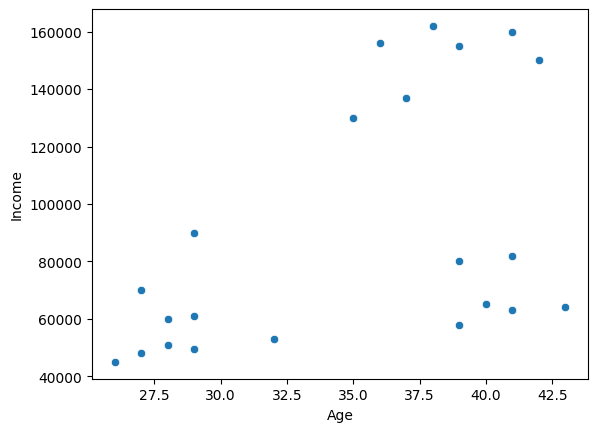

In [34]:
sns.scatterplot(x='Age', y='Income', data=df)

From this plot, we can see visually see that there are 3 distinct clusters.

Let's try to find these clusters with sklearn.

In [35]:
from sklearn.cluster import KMeans

# n_clusters is the number of clusters to look for
# random_state determines the random number generation for centroid initialization. 
# Use an int to make the randomness deterministic.
km = KMeans(n_clusters=3, random_state=0)
predicted_clusters = km.fit_predict(df[['Age', 'Income']])
predicted_clusters

/home/athena/Downloads/MLP/MLP_Code/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [36]:
df['Cluster'] = predicted_clusters
df.head()

,Name,Age,Income,Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [37]:
# gives the coordinates of the centroids of the clusters
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

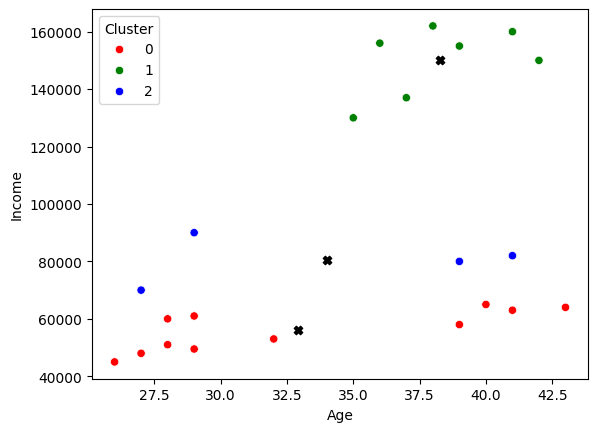

In [38]:
# visualize the clusters
sns.scatterplot(x='Age', y='Income', hue='Cluster', palette=['red', 'green', 'blue'], data=df)
# plot the cluster centroids on the same chart
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='X', label='centroid')

We can see from the above chart, that k-means failed to correctly find clusters in this case.

This is because of the fact that our data is on completely different scales. The income variable shows a large variation(from 40,000 to 160,000) compared to age which has much lower variation.

Many algorithms (especially the ones that calculate euclidean distances) are very sensitive to feature scaling.

We need to bring the features on similar scales before we can get proper clusters.

In [39]:
scaler = MinMaxScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df[['Age', 'Income']])
df_scaled.head()

,Age,Income
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [40]:
km = KMeans(n_clusters=3, random_state=0)
predicted_clusters = km.fit_predict(df_scaled[['Age', 'Income']])
predicted_clusters

/home/athena/Downloads/MLP/MLP_Code/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [41]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [42]:
df_scaled['Cluster'] = predicted_clusters
df_scaled.head()

,Age,Income,Cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1


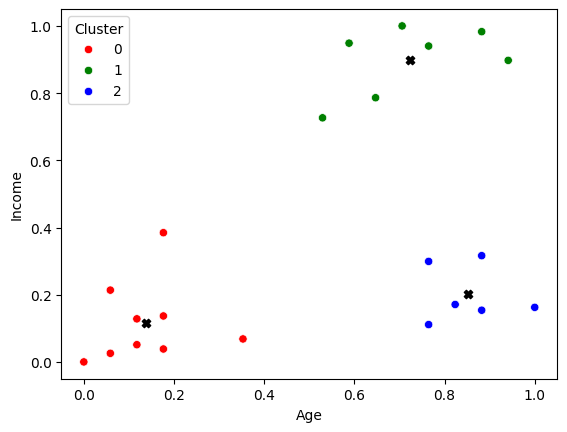

In [43]:
sns.scatterplot(x='Age', y='Income', hue='Cluster', palette=['red', 'green', 'blue'], data=df_scaled)
# plot the cluster centroids on the same chart
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='X', label='centroid')

The clusters are much better than before now that we have scaled our data

#### Elbow Plot

We can make an elbow plot to pick an appropriate value for k in our k-means algorithm. The plot shows how the error decreases as we increase the number of clusters.

We can obviously keep reducing the error by just increasing the number of clusters but that's useless. We need to find a sweet spot, a perfect balance for the value of k. 

We can just set k = n and make the error 0 but that's just useless overfitting. We want an optimal value of k that can reduce the error to a reasonable level.

In [47]:
sse = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(df_scaled[['Age', 'Income']])
    sse.append(km.inertia_)

/home/athena/Downloads/MLP/MLP_Code/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/athena/Downloads/MLP/MLP_Code/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/athena/Downloads/MLP/MLP_Code/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/athena/Downloads/MLP/MLP_Code/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.

In [48]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.26640301246684156,
 0.21055478995472496,
 0.1685851223602976,
 0.1397684499538816,
 0.10188787724979426,
 0.08510915216361345]

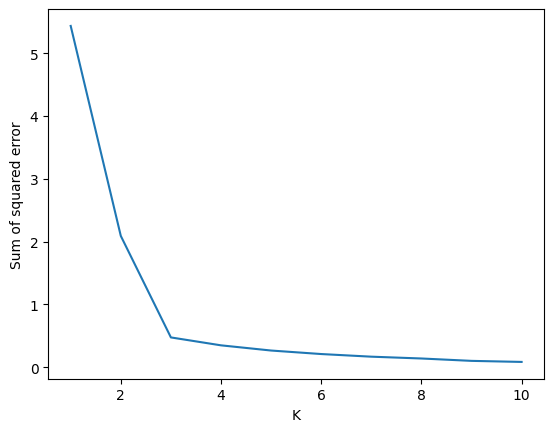

In [49]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse)

You see, after a certain point, increasing the number of clusters reduces the error very very slowly. And at the beginning, the effect of increasing the clusters is much more pronounced.